In [67]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
    
    import matplotlib.pyplot as plt
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()
    
    
    
    
from skimage import data
from skimage import io, color, img_as_ubyte, util
import warnings
warnings.filterwarnings('ignore')
from skimage import io, img_as_ubyte
from skimage.color import rgb2gray
import cv2
import numpy as np

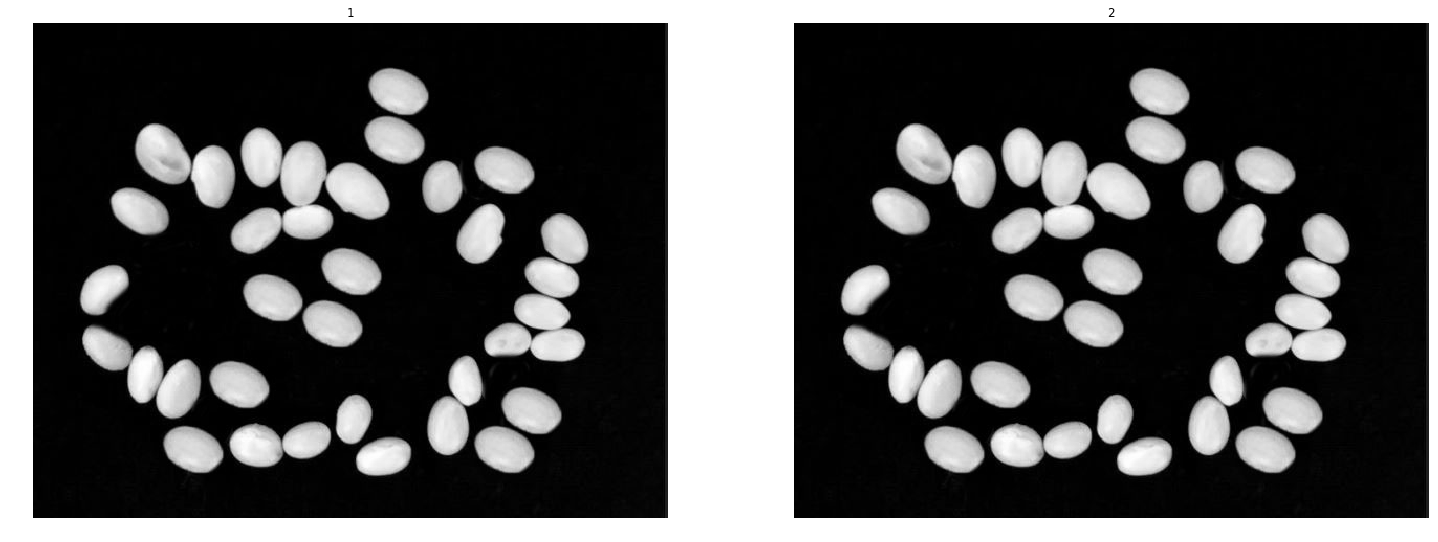

[[ 0  0  0 ... 22 34 29]
 [ 0  0  0 ... 22 34 29]
 [ 0  0  0 ... 22 34 29]
 ...
 [ 2  2  2 ... 31 32 31]
 [ 2  2  2 ... 31 32 32]
 [ 2  2  2 ... 35 26 31]]
min i max wartość
0 254


In [68]:
im="11.jpg"
obr = io.imread(im)
obr = color.rgb2gray(obr)
obr = img_as_ubyte(obr) 
#obr = util.invert(obr)
show2imgs(obr,obr,title1="1",title2="2",size=(25,25))
print(obr)
print("min i max wartość")
print(obr.min(), obr.max())


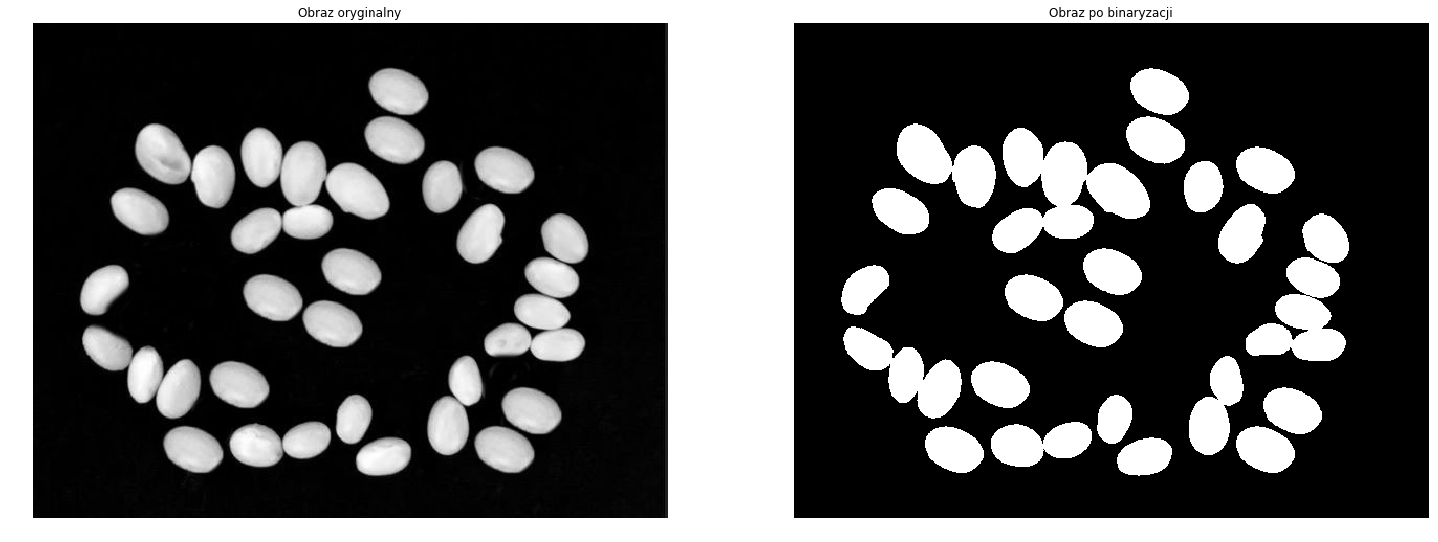

In [69]:
from skimage import data
import cv2


th = 150
th, bim = cv2.threshold(obr, thresh=th, maxval=255, type=cv2.THRESH_OTSU)

show2imgs(obr, bim, title1='Obraz oryginalny', title2='Obraz po binaryzacji', size=(25,25))

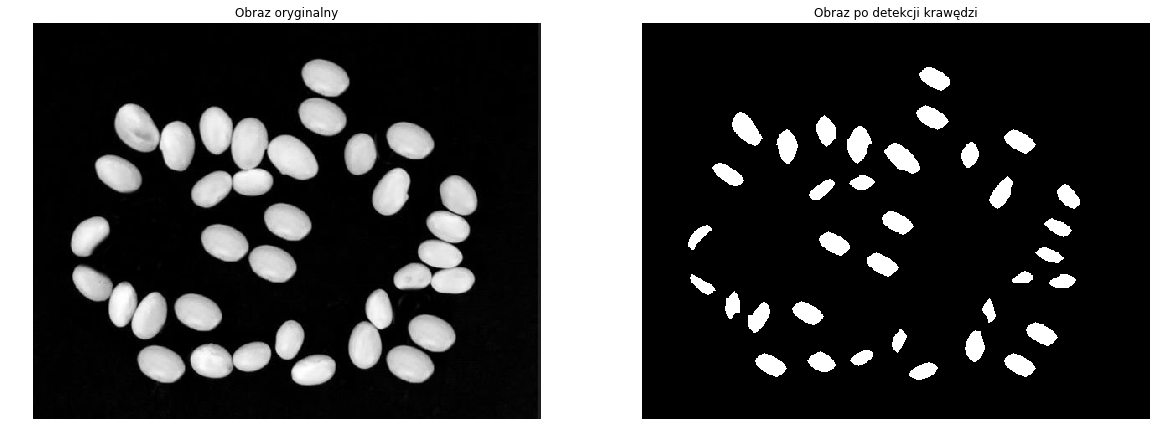

In [70]:
import cv2
import numpy as np

kernel = np.ones((8,8),np.uint8)
erodeBin = cv2.erode(bim, kernel=kernel, iterations=2)
show2imgs(obr, erodeBin, title1='Obraz oryginalny', title2='Obraz po detekcji krawędzi', size=(20,20))

In [71]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

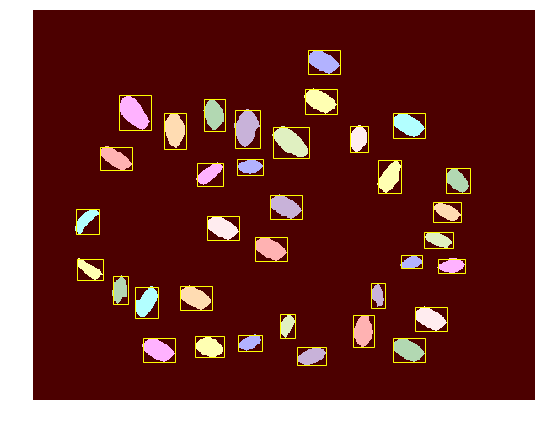

ziaren jest: 35


In [72]:
image = erodeBin[5:-5, 5:-5]
ilosc = 0

suma=0

thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))


cleared = clear_border(bw)


label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    
    if region.area >= 20:
        ilosc+=1
        
        minr, minc, maxr, maxc = region.bbox
        
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='yellow', linewidth=1)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show() 




print('ziaren jest:', ilosc)